# ML Project 18 

## Importing Data and Libraries

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Model
#Metrik

In [3]:
project_18 = pd.read_csv("movies.csv")

In [4]:
project_18

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [5]:
project_18 = project_18.drop(columns = ["index", "id"], axis = 1)

## Analysing and Visualizing Data 

In [6]:
project_18.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


### .info()

In [7]:
project_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4391 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [8]:
for i in project_18.columns:
    print(project_18[i].head(2), "\n")

0    237000000
1    300000000
Name: budget, dtype: int64 

0    Action Adventure Fantasy Science Fiction
1                    Adventure Fantasy Action
Name: genres, dtype: object 

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
Name: homepage, dtype: object 

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
Name: keywords, dtype: object 

0    en
1    en
Name: original_language, dtype: object 

0                                      Avatar
1    Pirates of the Caribbean: At World's End
Name: original_title, dtype: object 

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
Name: overview, dtype: object 

0    150.437577
1    139.082615
Name: popularity, dtype: float64 

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
Name: production_companies, dtype: obje

### making `year` column 

In [9]:
project_18["release_date"] = pd.to_datetime(project_18["release_date"])
project_18["years"] = project_18["release_date"].dt.year.astype("object")
project_18["years"]

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: years, Length: 4803, dtype: object

In [10]:
project_18 = project_18.drop(columns = "release_date", axis = 1)

### working on `production_companies` column (sadece production isimleri olan bir sütun oluşturacağım)

In [11]:
project_18["production_companies"]

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4798             [{"name": "Columbia Pictures", "id": 5}]
4799                                                   []
4800    [{"name": "Front Street Pictures", "id": 3958}...
4801                                                   []
4802    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4803, dtype: object

In [12]:
project_18["production_companies"].unique()

array(['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]',
       '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]',
       '[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]',
       ...,
       '[{"name": "Asylum Films", "id": 10571}, {"name": "FM Entertainment", "id": 26598}, {"name": "Eagle Eye Films Inc.", "id": 40739}]',
       '[{"name": "Front Street Pictures", "id": 3958}, {"name": "Muse Entertainment Enterprises", "id": 6438}]',
       '[{"name": "rusty bear entertainment", "id": 87986}, {"name": "lucky crow films", "id": 87987}]'],
      dtype=object)

In [13]:
import ast
project_18['company_names'] = project_18['production_companies'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])
project_18['company_names'] = project_18['company_names'].apply(lambda x: ', '.join(x))
project_18["company_names"]

0       Ingenious Film Partners, Twentieth Century Fox...
1       Walt Disney Pictures, Jerry Bruckheimer Films,...
2                          Columbia Pictures, Danjaq, B24
3       Legendary Pictures, Warner Bros., DC Entertain...
4                                    Walt Disney Pictures
                              ...                        
4798                                    Columbia Pictures
4799                                                     
4800    Front Street Pictures, Muse Entertainment Ente...
4801                                                     
4802           rusty bear entertainment, lucky crow films
Name: company_names, Length: 4803, dtype: object

In [14]:
project_18 = project_18.drop(columns = ["production_companies", "homepage"], axis = 1)

### working on `production_countries` column (sadece country isimleri olan bir sütun oluşturacağım)

In [15]:
project_18["production_countries"]

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [16]:
project_18["production_countries"].unique()

array(['[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]',
       '[{"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "JM", "name": "Jamaica"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "BS", "name": "Bahamas"}, {"iso_3166_1": "DM", "name": "Dominica"}]',
       '[{"iso_3166_1": "CZ", "name": "Czech Republic"}, {"iso_3166_1": "PL", "name": "Poland"}, {"iso_3166_1": "SI", "name": "Slovenia"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "DE", "name": "Germany"}]',
       '[{"iso_3166_1": "CN", "name"

In [17]:
project_18['country_names'] = project_18['production_countries'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])
project_18['country_names'] = project_18['country_names'].apply(lambda x: ', '.join(x))
project_18["country_names"]

0       United States of America, United Kingdom
1                       United States of America
2       United Kingdom, United States of America
3                       United States of America
4                       United States of America
                          ...                   
4798            Mexico, United States of America
4799                                            
4800                    United States of America
4801             United States of America, China
4802                    United States of America
Name: country_names, Length: 4803, dtype: object

In [18]:
project_18 = project_18.drop(columns = "production_countries", axis = 1)

### working on `crew` column (sadece crew üyelerinin isimlerinin olduğu bir sütun oluşturacağım)

In [19]:
project_18["crew"]

0       [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...
1       [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...
2       [{'name': 'Thomas Newman', 'gender': 2, 'depar...
3       [{'name': 'Hans Zimmer', 'gender': 2, 'departm...
4       [{'name': 'Andrew Stanton', 'gender': 2, 'depa...
                              ...                        
4798    [{'name': 'Robert Rodriguez', 'gender': 0, 'de...
4799    [{'name': 'Edward Burns', 'gender': 2, 'depart...
4800    [{'name': 'Carla Hetland', 'gender': 0, 'depar...
4801    [{'name': 'Daniel Hsia', 'gender': 2, 'departm...
4802    [{'name': 'Clark Peterson', 'gender': 2, 'depa...
Name: crew, Length: 4803, dtype: object

In [20]:
project_18["crew"].unique()

array(['[{\'name\': \'Stephen E. Rivkin\', \'gender\': 0, \'department\': \'Editing\', \'job\': \'Editor\', \'credit_id\': \'52fe48009251416c750aca23\', \'id\': 1721}, {\'name\': \'Rick Carter\', \'gender\': 2, \'department\': \'Art\', \'job\': \'Production Design\', \'credit_id\': \'539c47ecc3a36810e3001f87\', \'id\': 496}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Sound Designer\', \'credit_id\': \'54491c89c3a3680fb4001cf7\', \'id\': 900}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Supervising Sound Editor\', \'credit_id\': \'54491cb70e0a267480001bd0\', \'id\': 900}, {\'name\': \'Mali Finn\', \'gender\': 1, \'department\': \'Production\', \'job\': \'Casting\', \'credit_id\': \'539c4a4cc3a36810c9002101\', \'id\': 1262}, {\'name\': \'James Horner\', \'gender\': 2, \'department\': \'Sound\', \'job\': \'Original Music Composer\', \'credit_id\': \'5544ee3b925141499f0008fc\', \'id\': 1729}, {\'name\': 

In [21]:
project_18['crew_members'] = project_18['crew'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])
project_18['crew_members'] = project_18['crew_members'].apply(lambda x: ', '.join(x))
project_18["crew_members"]

0       Stephen E. Rivkin, Rick Carter, Christopher Bo...
1       Dariusz Wolski, Gore Verbinski, Jerry Bruckhei...
2       Thomas Newman, Sam Mendes, Anna Pinnock, John ...
3       Hans Zimmer, Charles Roven, Christopher Nolan,...
4       Andrew Stanton, Andrew Stanton, John Lasseter,...
                              ...                        
4798    Robert Rodriguez, Robert Rodriguez, Robert Rod...
4799    Edward Burns, Edward Burns, Edward Burns, Will...
4800    Carla Hetland, Harvey Kahn, Adam Sliwinski, Ma...
4801                             Daniel Hsia, Daniel Hsia
4802    Clark Peterson, Andrew Reimer, Brian Herzlinge...
Name: crew_members, Length: 4803, dtype: object

In [22]:
project_18 = project_18.drop(columns = "crew", axis = 1)

In [23]:
project_18.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,spoken_languages,...,tagline,title,vote_average,vote_count,cast,director,years,company_names,country_names,crew_members
0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,2009.0,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","Stephen E. Rivkin, Rick Carter, Christopher Bo..."
1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,2007.0,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,"Dariusz Wolski, Gore Verbinski, Jerry Bruckhei..."


### working on `spoken_languages` column (sadece spoken languages isimlerinin olduğu bir sütun oluşturacağım)

In [24]:
project_18["spoken_languages"]

0       [{"iso_639_1": "en", "name": "English"}, {"iso...
1                [{"iso_639_1": "en", "name": "English"}]
2       [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3                [{"iso_639_1": "en", "name": "English"}]
4                [{"iso_639_1": "en", "name": "English"}]
                              ...                        
4798        [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]
4799                                                   []
4800             [{"iso_639_1": "en", "name": "English"}]
4801             [{"iso_639_1": "en", "name": "English"}]
4802             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, Length: 4803, dtype: object

In [25]:
project_18["spoken_languages"].unique()

array(['[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]',
       '[{"iso_639_1": "en", "name": "English"}]',
       '[{"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]',
       '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}]',
       '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]',
       '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]',
       '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "tr", "name": "T\\u00fcrk\\u00e7e"}, {"iso_639_1": "el", "name": "\\u03b5\\u03bb\\u03bb\\u03b7\\u03bd\\

In [26]:
project_18['spoken_languages'] = project_18['spoken_languages'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])
project_18['spoken_languages'] = project_18['spoken_languages'].apply(lambda x: ', '.join(x))
project_18["spoken_languages"]

0                                    English, Español
1                                             English
2       Français, English, Español, Italiano, Deutsch
3                                             English
4                                             English
                            ...                      
4798                                          Español
4799                                                 
4800                                          English
4801                                          English
4802                                          English
Name: spoken_languages, Length: 4803, dtype: object

In [27]:
project_18.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,spoken_languages,...,tagline,title,vote_average,vote_count,cast,director,years,company_names,country_names,crew_members
0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,"English, Español",...,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,2009.0,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","Stephen E. Rivkin, Rick Carter, Christopher Bo..."
1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,English,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,2007.0,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,"Dariusz Wolski, Gore Verbinski, Jerry Bruckhei..."


### .unique() and .nunique()

In [28]:
for i in project_18.select_dtypes(include = ["object", "category"]).columns:
    print(f"{i}:", project_18[i].nunique(), "\n")

genres: 1168 

keywords: 4219 

original_language: 37 

original_title: 4801 

overview: 4800 

spoken_languages: 529 

status: 3 

tagline: 3944 

title: 4800 

cast: 4741 

director: 2349 

years: 90 

company_names: 3697 

country_names: 469 

crew_members: 4766 



In [29]:
are_equal =  project_18['original_title'].equals(project_18['title'])
are_equal

False

In [30]:
project_18["original_title"]

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: original_title, Length: 4803, dtype: object

+ Bu sütunlar arasında; `genres`, `original_language`, `production_countries`, `production_companies`, `spoken_languages`, `status`, `director` ve `cast` sütunları kategorik olabilir ve önemli olabilir. Diğerleri ise metin içeren sütunlar olabilir ve yine önemli olabilir. Kategorik olabileceğini düşündüğüm sütunlarda çok fazla kategori olduğundan direkt olarak bu metinleri birleştirip, tek bir metin sütunu ortaya çıkaracağım. 

### .duplicated() and drop_duplicated()

In [31]:
project_18.duplicated().sum()

np.int64(0)

### Displot graph of numerical columns

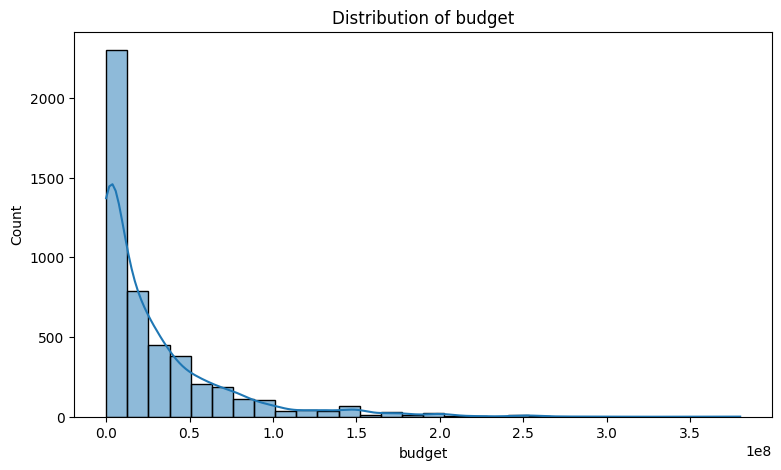

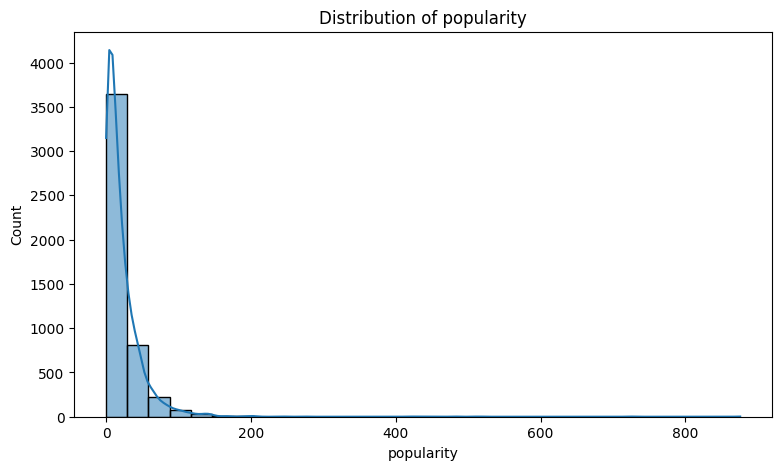

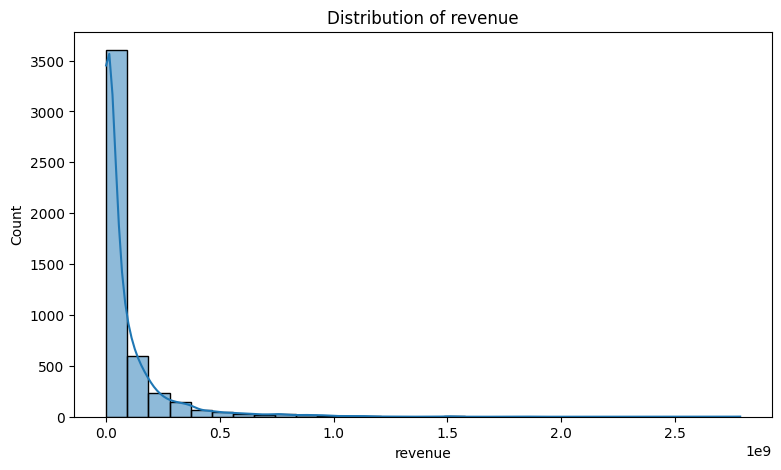

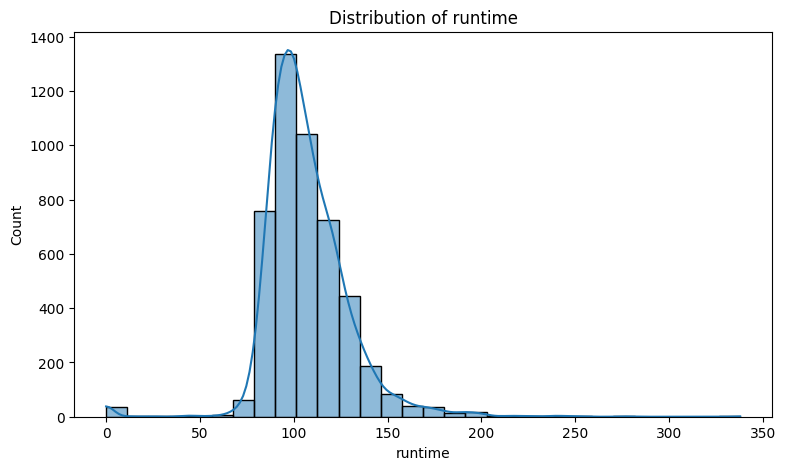

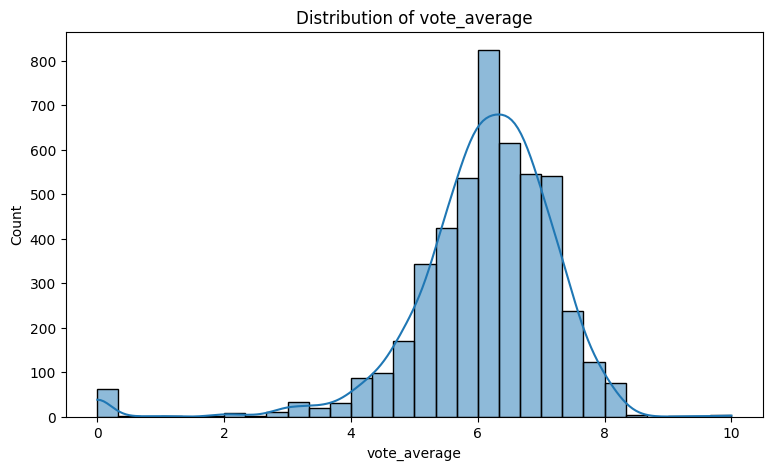

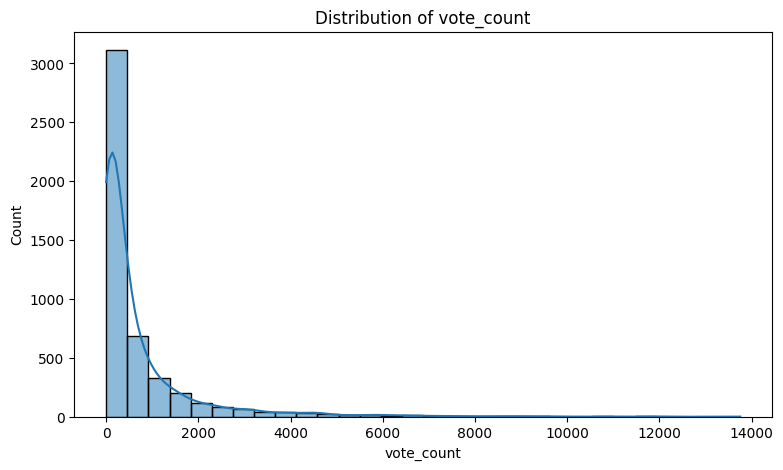

In [32]:
for column in project_18.select_dtypes(include = ["float64", "int64"]):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_18, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [33]:
print(project_18.select_dtypes(include = ["int64", "float64"]).skew(), "\n \n",
     f"Skew ortalaması: {project_18.select_dtypes(include = ["int64", "float64"]).skew().mean()}")

budget          2.437211
popularity      9.721416
revenue         4.444716
runtime         0.715957
vote_average   -1.959710
vote_count      3.824069
dtype: float64 
 
 Skew ortalaması: 3.197276399514566


+ Numerik sütunlara, logaritmik, karekök, küpkök dönüşümlerinden birini uygulayıp sağa çarpıklığı engelleyeceğim. Ya da normal dağılım şartının sağlanmasını önemsemeyen modeller kullanacağım 

### .isnull().sum()

In [34]:
#Integer veya float olan sütunlardaki Null değerlerin sorgulanması
project_18.select_dtypes(include = ["float64", "int64"]).isnull().sum()

budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

+ Yukarıdaki başlıklarda dağılımın sağa çarpık olduğunu, özellikle `runtime` sütununun sağa çarpık olduğunu gördüm. Bu yüzden bu sütundaki boş değerleri `median (medyan)` ile dolduracağım. Çünkü medyan dağılımın çarpıklığından etkilenmiyor. Çarpıklık sorununu çözdükten sonra ortalama ile de doldurabilirdim ancak şimdilik bu şekilde dolduracağım. 

In [35]:
project_18["runtime"] = project_18["runtime"].fillna(project_18["runtime"].median())
project_18.select_dtypes(include = ["float64", "int64"]).isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [36]:
#Metin veya kategorik olan sütunlardaki Null değerlerin sorgulanması
project_18.select_dtypes(include = "object").isnull().sum()

genres                28
keywords             412
original_language      0
original_title         0
overview               3
spoken_languages       0
status                 0
tagline              844
title                  0
cast                  43
director              30
years                  1
company_names          0
country_names          0
crew_members           0
dtype: int64

+ String sütunlardaki Null değerleri boşluk ile dolduracağım çünkü veri kaybetmek istemiyorum

In [37]:
project_18 = project_18.fillna("")
project_18.isnull().sum()

budget               0
genres               0
keywords             0
original_language    0
original_title       0
overview             0
popularity           0
revenue              0
runtime              0
spoken_languages     0
status               0
tagline              0
title                0
vote_average         0
vote_count           0
cast                 0
director             0
years                0
company_names        0
country_names        0
crew_members         0
dtype: int64

### Combining the string columns for TfidfVectorizer

+ String türündeki bütün sütunlarda bulunan metinleri, tek bir sütunda yan yana yazacak şekilde birleştireceğim ve elde edeceğim yeni ve tek sütunu TfidfVectorizer ile sayısal bir hale getireceğim

In [38]:
project_18.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,spoken_languages,...,tagline,title,vote_average,vote_count,cast,director,years,company_names,country_names,crew_members
0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,"English, Español",...,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,2009.0,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","Stephen E. Rivkin, Rick Carter, Christopher Bo..."
1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,English,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,2007.0,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,"Dariusz Wolski, Gore Verbinski, Jerry Bruckhei..."


In [39]:
selected_features = project_18.select_dtypes(include = "object").columns.tolist()
selected_features

['genres',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'cast',
 'director',
 'years',
 'company_names',
 'country_names',
 'crew_members']

In [40]:
# Boş bir liste oluşturun
combined_features_list = []

# Her sütun için döngü
for column in selected_features:
    combined_features_list.append(project_18[column])

# Sütunları birleştirin
combined_features = project_18[selected_features].apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Sonuç
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  en Newlyweds A newlywed couple...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      en Shanghai Calling When ambitious New York ...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


## TfidfVectorizer

+ Tek ve bütün metinleri içeren bir sütun olarak elde ettiğim `combined_features` isimli sütunu sayısal bir veriye dönüştürüp RecommenderSystem kullanabilmek için TfidfVectorizer uygulayacağım 

In [41]:
vectorizer = TfidfVectorizer()

In [42]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [43]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 603910 stored elements and shape (4803, 59486)>
  Coords	Values
  (0, 747)	0.019751282422929957
  (0, 938)	0.02263468073197132
  (0, 18042)	0.028188375785713735
  (0, 46707)	0.026237633941081327
  (0, 18567)	0.026312910476085166
  (0, 12560)	0.04806014150910284
  (0, 10457)	0.05132355247648212
  (0, 20000)	0.036395577054247466
  (0, 49321)	0.07978092796450777
  (0, 56944)	0.028477706277218837
  (0, 10992)	0.056776756803552805
  (0, 48962)	0.04377737319949091
  (0, 16809)	0.00883097327901682
  (0, 3560)	0.1343567575027738
  (0, 25666)	0.011982988220433855
  (0, 52378)	0.02686029702114349
  (0, 256)	0.06532563013154605
  (0, 9351)	0.06179818764542162
  (0, 39623)	0.06381182428446788
  (0, 33428)	0.04726878633415272
  (0, 26341)	0.013766031371655782
  (0, 14746)	0.059570467257398306
  (0, 52884)	0.010225552303196566
  (0, 36098)	0.04497506975906117
  (0, 39487)	0.1084823795644823
  :	:
  (4802, 4751)	0.07924548332440902
  (4802

## cosine_similarity (Kosinüs Benzerliği)

`cosine_similarity` fonksiyonu, **Recommender Systems (Öneri Sistemleri)**'nde sıkça kullanılan bir işlevdir. Öneri sistemlerinde benzerlik hesaplamaları, kullanıcılara veya öğelere benzerliklerini ölçmek ve tavsiyeler oluşturmak için kullanılır.

**1. Kullanıcılar Arası Benzerlik**
+ Öneri sistemlerinde, kullanıcılar arasındaki benzerliği ölçmek için cosine_similarity kullanılabilir. Örneğin, kullanıcıların beğenileri veya puanları bir vektörle temsil edilir ve bu vektörler arasındaki kosinüs benzerliği hesaplanır. Benzer kullanıcılar, birbirlerinin beğenilerini ve puanlarını tahmin etmek için kullanılabilir.

**2. Öğeler Arası Benzerlik**
+ Öğeler arasındaki benzerliği ölçmek için de cosine_similarity kullanılır. Örneğin, filmleri veya ürünleri temsil eden özellik vektörleri arasındaki benzerlikler hesaplanarak, benzer öğeleri önerme yapılabilir. Bu tür benzerlikler genellikle içerik tabanlı öneri sistemlerinde kullanılır.

**3. İçerik Tabanlı Öneri Sistemleri**

+ İçerik tabanlı öneri sistemlerinde, her öğe (örneğin, bir film veya ürün) özellik vektörleri ile temsil edilir. Bu vektörler, öğenin özelliklerini temsil eder (örneğin, bir filmin türleri, yönetmeni, oyuncuları gibi). Kullanıcıların daha önce beğendiği veya ilgilendiği öğelere benzer özelliklere sahip yeni öğeleri önerirken, cosine_similarity kullanılır.

**4. Kullanıcı Profilleme**

+ Kullanıcı profilleri, kullanıcıların ilgi alanlarını ve tercihlerini temsil eden vektörlerdir. Kullanıcı profili vektörleri ile öğe vektörleri arasındaki kosinüs benzerliği hesaplanarak, kullanıcılara en uygun öğeler önerilir.

In [44]:
similarity = cosine_similarity(feature_vectors)

In [45]:
similarity

array([[1.        , 0.06140934, 0.07390786, ..., 0.02460255, 0.01131979,
        0.01809957],
       [0.06140934, 1.        , 0.031199  , ..., 0.03726654, 0.02791959,
        0.02079157],
       [0.07390786, 0.031199  , 1.        , ..., 0.02524515, 0.03195459,
        0.00601121],
       ...,
       [0.02460255, 0.03726654, 0.02524515, ..., 1.        , 0.02684531,
        0.03455737],
       [0.01131979, 0.02791959, 0.03195459, ..., 0.02684531, 1.        ,
        0.02433495],
       [0.01809957, 0.02079157, 0.00601121, ..., 0.03455737, 0.02433495,
        1.        ]])

**Kodun İşlevi**

+ feature_vectors: Bu, genellikle metin verilerinden elde edilen sayısal özellikler (vektörler) matrisidir. Özellik vektörleri, metinleri sayısal bir formata dönüştüren teknikler kullanılarak elde edilir (örneğin, TF-IDF, Word2Vec, veya bir gömme (embedding) yöntemi gibi).

+ cosine_similarity: Bu, iki vektör arasındaki açıyı hesaplayarak benzerliklerini ölçen bir metottur. Benzerlik skoru, vektörler arasındaki kosinüs açısının değeri olarak hesaplanır. Bu değer 0 ile 1 arasında değişir:

    + 1: Vektörler tamamen aynı yöndedir.
    + 0: Vektörler birbirine dik veya tamamen farklıdır.

## Recommender System

In [46]:
#Kullanıcıdan film ismi alma
movie_name = input("Enter your favourite movie name: ")

In [47]:
#Tüm film isimlerini tek bir listede toplama
list_of_all_titles = project_18["title"].tolist()
list_of_all_titles

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [48]:
#Kullanıcının girdiği film ismine benzer filmleri bulma (Eşleşme bulma)
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

In [49]:
#En yakın eşleymeyi seçme
close_match = find_close_match[0]

IndexError: list index out of range

In [ ]:
#Filmin indeksini bulma 
index_of_the_movie = project_18[project_18.title == close_match].index.values[0]

In [ ]:
#Benzerlik skorlarını hesaplama
similarity_score = list(enumerate(similarity[index_of_the_movie]))

In [ ]:
#Benzer filmleri sıralama
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

In [ ]:
#Önerilen filmleri yazdırma
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = project_18[project_18.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Interstellar
2 . The Dark Knight Rises
3 . The Dark Knight
4 . The Prestige
5 . Inception
6 . Batman Begins
7 . Man of Steel
8 . Memento
9 . Jurassic World
10 . The Amazing Spider-Man
11 . Transcendence
12 . Deep Impact
13 . Contact
14 . Must Love Dogs
15 . John Carter
16 . The Siege
17 . The Hunger Games: Mockingjay - Part 1
18 . The Chronicles of Riddick
19 . Insomnia
20 . War of the Worlds
21 . Cursed
22 . 15 Minutes
23 . Hulk
24 . A.I. Artificial Intelligence
25 . Master and Commander: The Far Side of the World
26 . Independence Day: Resurgence
27 . Men in Black
28 . Bruce Almighty
29 . Avatar
